In [1]:
import numpy as np
import sympy as sp
import random
from matplotlib import pyplot as plt

## Plot a unique system of equations

In this example we have 2 equations: C + D = 2 and C + 2D = 5. 

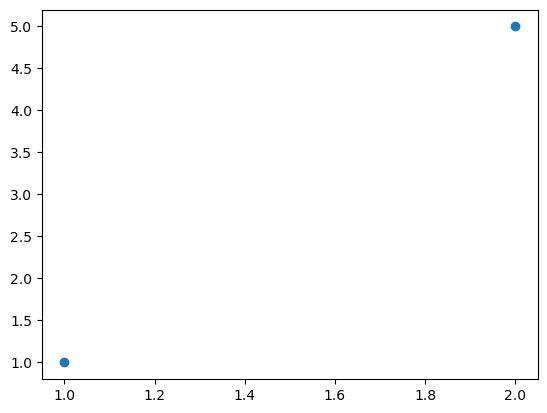

In [14]:
x = np.array([1, 2])
y = np.array([1, 5])

plt.scatter(x, y)
plt.savefig("plotwithout_line.jpg")
plt.show()

In [3]:
A_unique = np.column_stack((np.ones(len(x)), x))
b_unique = y.reshape(-1, 1) # -1 means "whatever it takes to flatten and 1 means it should have one column"

In [4]:
# Apply normal equations
A_unique_transpose = np.transpose(A_unique)
A_T_A_unique = np.linalg.inv(np.matmul(A_unique_transpose, A_unique))
A_T_b_unique = np.matmul(A_unique_transpose, b_unique)
x_hat = np.matmul(A_T_A_unique, A_T_b_unique)
x_hat

array([[-3.],
       [ 4.]])

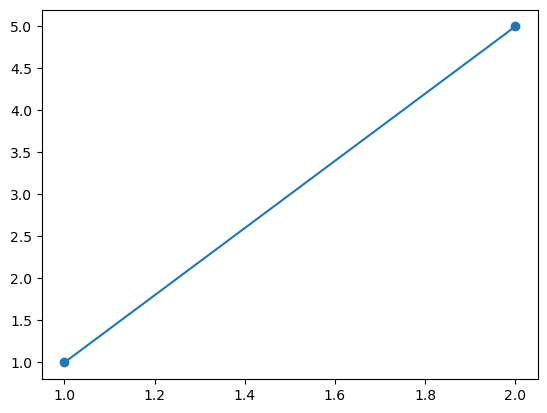

In [16]:
uni_npsort = np.sort(x) # Not sure I even need this
y1 = x_hat[1][0]*uni_npsort + x_hat[0][0]

plt.scatter(x, y)
plt.plot(uni_npsort, y1)
plt.savefig('plotwith_line.png')
plt.show()

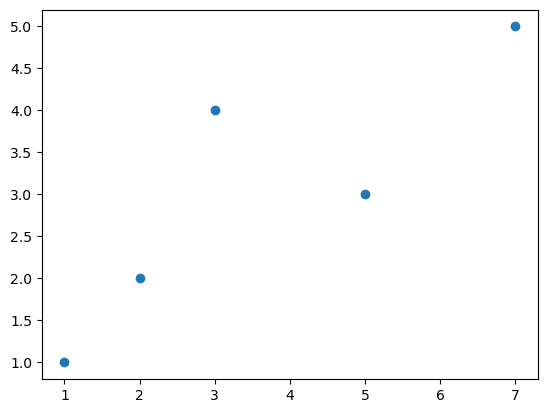

In [17]:
x = np.array([1, 2, 3, 5, 7])
y = np.array([1, 2, 4, 3, 5])

plt.scatter(x, y)
plt.savefig("plotwith5_pts.png")
plt.show()

In [18]:
A = np.column_stack((np.ones(len(x)), x)) # Turns np arrays into columns of A
b = y.reshape(-1, 1) # Automatically reshapes data into a 2D vector instead of a 1D array

In [19]:
# Apply orthogonality formula
A_transpose = np.transpose(A)
A_T_A = np.linalg.inv(np.matmul(A_transpose, A))
A_T_b = np.matmul(A_transpose, b)
x_hat = np.matmul(A_T_A, A_T_b)
x_hat

array([[0.98275862],
       [0.56034483]])

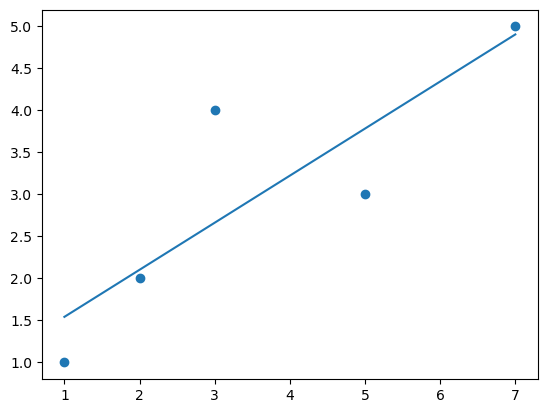

In [21]:
npsort = np.sort(x) # Sort the data

y1 = x_hat[1][0]*npsort + x_hat[0][0]

plt.scatter(x, y)
plt.plot(npsort, y1)
plt.savefig("nosoln.png")
plt.show()

In [6]:
p = np.matmul(A, x_hat)
p

array([[1.54310345],
       [2.10344828],
       [2.6637931 ],
       [3.78448276],
       [4.90517241]])

In [7]:
e = b - p
e

residuals = sum([res[0] * res[0] for res in e])
residuals

2.7155172413793096

In [8]:
assert b.all() == p.all() + e.all() # Confirm the final equation works

In [9]:
alpha = np.linalg.lstsq(A, b, rcond=None)
alpha

(array([[0.98275862],
        [0.56034483]]),
 array([2.71551724]),
 2,
 array([9.57786484, 1.12450215]))

## Another example with more data (300 data points)

In [10]:
import polars as pl

In [11]:
df = pl.read_csv('train.csv')
df.shape

(300, 2)

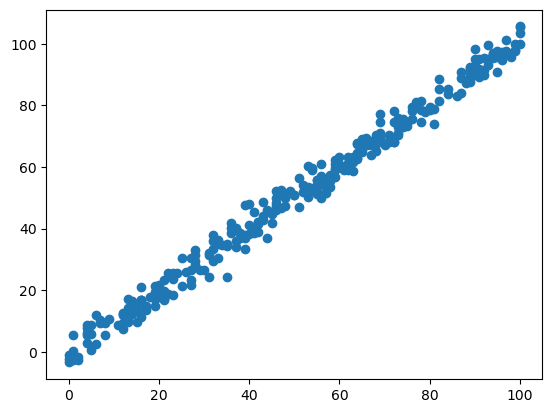

In [12]:
# Plot first to see bare data without least squares fit

plt.scatter(df['x'], df['y'])

In [14]:
A_more_data = np.column_stack((np.ones(len(df['x'])), df['x'])) # Turns np arrays into columns of A

# Try preprocess?
y_more_data = np.array([df['y']])
b_more_data = y_more_data.reshape(-1, 1) # Automatically reshapes data into a 2D vector instead of a 1D array

In [15]:
# Apply the same formula to find x hat
A_transpose_more_data = np.transpose(A_more_data)
A_T_A_more_data = np.linalg.inv(np.matmul(A_transpose_more_data, A_more_data))
A_T_b_more_data = np.matmul(A_transpose_more_data, b_more_data)
x_hat_more_data = np.matmul(A_T_A_more_data, A_T_b_more_data)
x_hat_more_data

array([[-0.46181077],
       [ 1.01433536]])

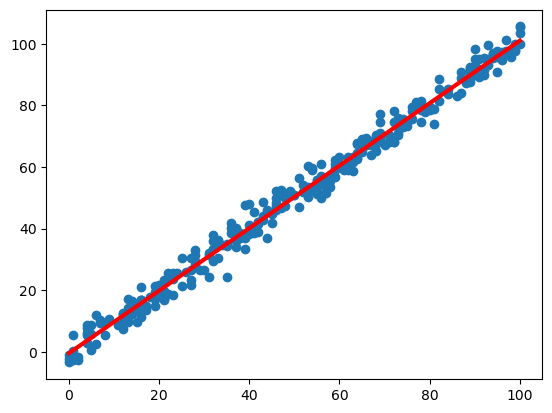

In [24]:
# Sort the data points by x values
df_sorted = df.sort('x')

y1_more_data = x_hat_more_data[1][0]*df_sorted['x'] + x_hat_more_data[0][0]

plt.scatter(df['x'], y_more_data)
plt.plot(df_sorted['x'], y1_more_data, color="red", linewidth = 3)

plt.show()

In [25]:
p_more_data = np.matmul(A_more_data, x_hat_more_data)
#p_more_data

In [26]:
e_more_data = b_more_data - p_more_data
#e_more_data

residuals_more_data = sum([res[0] * res[0] for res in e_more_data])
residuals_more_data

2749.2863581842776

In [19]:
assert b_more_data.all() == p_more_data.all() + e_more_data.all() # Confirm the final equation works

In [20]:
alpha_more_data = np.linalg.lstsq(A_more_data, b_more_data, rcond=None)
alpha_more_data

(array([[-0.46181077],
        [ 1.01433536]]),
 array([2749.28635818]),
 2,
 array([1010.70651287,    8.44658817]))